In [91]:
import netCDF4
import xarray as xr
import pandas as pd
from numpy.ma import log10
import itertools
from matplotlib.pyplot import subplots, colorbar, cm
import matplotlib.colors as mcolors
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.dates import date2num, DateFormatter, HourLocator

In [92]:
import os

import datetime

from datetime import datetime

from datetime import timedelta

import numpy as np
 
import matplotlib

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})

import matplotlib.patches as mpatches

from matplotlib.collections import LineCollection

from matplotlib.colors import ListedColormap, BoundaryNorm

import matplotlib.colors as colors

from matplotlib.colors import LinearSegmentedColormap

import matplotlib.cbook as cbook

In [93]:
datapath = r"C:\Users\harr732\OneDrive - PNNL\Documents\Data"
os.listdir(datapath)[0]
file = os.listdir(datapath)[32]

In [94]:
file

'nsathermocldphaseC1.c1.20180202.000000.nc'

In [95]:
filename = os.path.join(datapath, file)

In [96]:
os.listdir(datapath)

['nsathermocldphaseC1.c1.20180101.000000.nc',
 'nsathermocldphaseC1.c1.20180102.000000.nc',
 'nsathermocldphaseC1.c1.20180103.000000.nc',
 'nsathermocldphaseC1.c1.20180104.000000.nc',
 'nsathermocldphaseC1.c1.20180105.000000.nc',
 'nsathermocldphaseC1.c1.20180106.000000.nc',
 'nsathermocldphaseC1.c1.20180107.000000.nc',
 'nsathermocldphaseC1.c1.20180108.000000.nc',
 'nsathermocldphaseC1.c1.20180109.000000.nc',
 'nsathermocldphaseC1.c1.20180110.000000.nc',
 'nsathermocldphaseC1.c1.20180111.000000.nc',
 'nsathermocldphaseC1.c1.20180112.000000.nc',
 'nsathermocldphaseC1.c1.20180113.000000.nc',
 'nsathermocldphaseC1.c1.20180114.000000.nc',
 'nsathermocldphaseC1.c1.20180115.000000.nc',
 'nsathermocldphaseC1.c1.20180116.000000.nc',
 'nsathermocldphaseC1.c1.20180117.000000.nc',
 'nsathermocldphaseC1.c1.20180118.000000.nc',
 'nsathermocldphaseC1.c1.20180119.000000.nc',
 'nsathermocldphaseC1.c1.20180120.000000.nc',
 'nsathermocldphaseC1.c1.20180121.000000.nc',
 'nsathermocldphaseC1.c1.20180122.

In [97]:
len(os.listdir(datapath))

121

In [98]:
filename = os.path.join(datapath, file)

In [99]:
import netCDF4 as nc

# Open the NetCDF file
nc_file = nc.Dataset(filename, 'r')

# Print the variables and dimensions
print("Variables:", nc_file.variables)
print("Dimensions:", nc_file.dimensions)

# Access a specific variable
variable_data = nc_file.variables['variable_name'][:]
print("Variable Data:", variable_data)

# Close the NetCDF file
nc_file.close()


Variables: {'base_time': <class 'netCDF4._netCDF4.Variable'>
int32 base_time()
    string: 2018-02-02 00:00:00 0:00
    long_name: Base time in Epoch
    units: seconds since 1970-1-1 0:00:00 0:00
    ancillary_variables: time_offset
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of -2147483647 used, 'time_offset': <class 'netCDF4._netCDF4.Variable'>
float64 time_offset(time)
    long_name: Time offset from base_time
    units: seconds since 2018-02-02 00:00:00 0:00
    ancillary_variables: base_time
unlimited dimensions: time
current shape = (2880,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    long_name: Time offset from midnight
    units: seconds since 2018-02-02 00:00:00 0:00
    bounds: time_bounds
    standard_name: time
unlimited dimensions: time
current shape = (2880,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bounds': <class 'netCDF4._netCDF4.

KeyError: 'variable_name'

In [102]:
nc_file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    command_line: thermocldphase -s nsa -f C1 -b 20180101 -e 20230101 -R
    Conventions: ARM-1.3
    process_version: vap-thermocldphase-0.3-0.el7
    dod_version: thermocldphase-c1-1.3
    input_datastreams: nsa30smplcmask1zwangC1.c1 : 1.2 : 20180201.000002-20180203.000007
nsaarsclkazr1kolliasC1.c0 : 1.2 : 20180201.000000-20180203.000000
nsahsrlC1.a1 : 1.1 : 20180201.000000-20180203.000000
nsainterpolatedsondeC1.c1 : 6.6 : 20180201.000030-20180203.000030
nsamwrret1liljclouC1.c2 : 1.11 : 20180201.000040-20180203.000015
    site_id: nsa
    platform_id: thermocldphase
    facility_id: C1
    data_level: c1
    location_description: North Slope of Alaska (NSA), Barrow, Alaska
    datastream: nsathermocldphaseC1.c1
    doi: 10.5439/1871014
    liquid_ice_temp_threshold: -0.3
    liquid_ice_temp_threshold_comment: Temperature (degC) distinguishing between generic liquid and ice.
    drizzle_temp_

In [104]:
def getCLOUDVAP(filename):
 
    # Get Data
    with xr.open_dataset(filename) as ds:
        ds
    time = ds['time'].data
    height = ds['height'].data
    cldphase_mplgr = ds['cloud_phase_mplgr'].data
    cldphase_layer_mplgr = ds['cloud_phase_layer_mplgr'].data
    mpl_dep = ds['mpl_linear_depol_ratio'].data
    mpl_backscat = ds['mpl_backscatter'].data * \
    (ds['height'].data**2)
    mpl_backscat[mpl_backscat <= 0] = 10**-9
    ds['mpl_backscatter'].data = mpl_backscat
    ds['mpl_backscatter'].attrs[
    'units'] = f"log10({ds['mpl_backscatter'].attrs['units']})"
    arscl_cloud_top = ds['cloud_layer_top_height'].data
    arscl_cloud_base = ds['cloud_layer_base_height'].data
    arscl_ze = ds['reflectivity_best_estimate'].data
    arscl_ze_snr = ds['radar_signal_to_noise_ratio'].data
    arscl_w = ds['spectral_width'].data
    arscl_mdv = ds['mean_doppler_velocity'].data
    combined_ze = arscl_ze.copy()
    combined_mdv = arscl_mdv.copy()
    combined_w = arscl_w.copy()
    mwr_lwp = ds['mwrret1liljclou_be_lwp'].data
    sonde_temp = ds['temp'].data
    mpl_backscat_ts = log10(mpl_backscat).transpose()
    
    cldphase_layer_pixel = np.zeros(mpl_backscat.shape, dtype=int)
    for j, k in itertools.product(range(0, len(time)), range(0, 10)):
        cloud_top_jk = arscl_cloud_top[j, k] * 0.001
        cloud_base_jk = arscl_cloud_base[j, k] * 0.001
        if(cloud_top_jk > 0) and (cloud_base_jk > 0):
            if(cldphase_layer_mplgr[j, k] == 1):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 1
            if(cldphase_layer_mplgr[j, k] == 2):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 2
            if(cldphase_layer_mplgr[j, k] == 3):
                cldphase_layer_pixel[j, np.where(
                    (height <= cloud_top_jk) & (height >= cloud_base_jk))] = 3
    return {"time": time, "height": height, "cldphase_mplgr": cldphase_mplgr,"cldphase_layer_mplgr": cldphase_layer_mplgr, "mpl_dep": mpl_dep, "mpl_backscat": mpl_backscat,"arscl_cloud_top": arscl_cloud_top, "arscl_cloud_base": arscl_cloud_base, "arscl_ze": arscl_ze, "arscl_ze_snr": arscl_ze_snr, "arscl_w": arscl_w, "arscl_mdv": arscl_mdv,"combined_ze": combined_ze, "combined_mdv": combined_mdv, "combined_w": combined_w,"mwr_lwp": mwr_lwp, "sonde_temp": sonde_temp, "mpl_backscat_ts": mpl_backscat_ts,"cldphase_layer_pixel": cldphase_layer_pixel}
# How to use:
# d = getCLOUDVAP(filename)
# time = d["time"]       

In [106]:
 d = getCLOUDVAP(filename)

In [108]:
def set_axes(ax, font_size, font_weight, up_hgt, x_nvis,color_bar_label, padding):
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size, fontweight=font_weight)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size, fontweight=font_weight)
    ax.set_title(ax.get_title(), fontsize=font_size, fontweight=font_weight)
   
    for tick in ax.get_xticklabels():
        tick.set_fontsize(font_size)
   
    for tick in ax.get_yticklabels():
        tick.set_fontsize(font_size)
       
    clrs = sns.color_palette("colorblind", 9)
    font = {'weight': font_weight, 'size': font_size}
    matplotlib.rc('font', **font)
   
    ax.set_ylim(0, up_hgt)
    plt.locator_params(axis='y', nbins=5)
    ax.set_ylabel('Height (km)')
   
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", "3%", pad=padding)
    cb = colorbar(pplot, cax=cax)
    cb.ax.set_ylabel((color_bar_label))
    cb.ax.set_ylabel(cb.ax.get_ylabel(), fontsize=font_size, fontweight=font_weight)
   
    if x_nvis ==1:
        plt.setp(ax.get_xticklabels(), visible=False)
       
    return cb, ax
# # Example usage:
# fig, ax = plt.subplots()
# ax.plot([1, 2, 3, 4], [2, 4, 1, 3])
 
# # Call the function to set the font size for the axes
# set_axes(ax, 12, 'bold', 8, 1)
 
# plt.show()

C:\Users\harr732\AppData\Local\Temp\ipykernel_3760\134815139.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("jet")


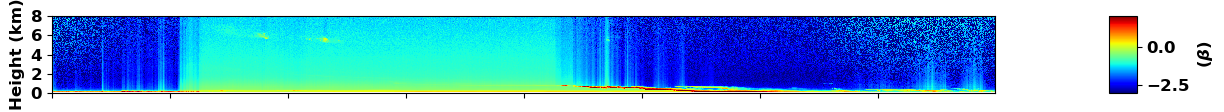

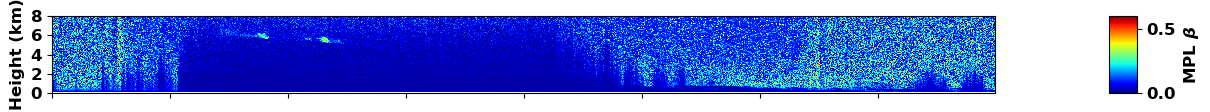

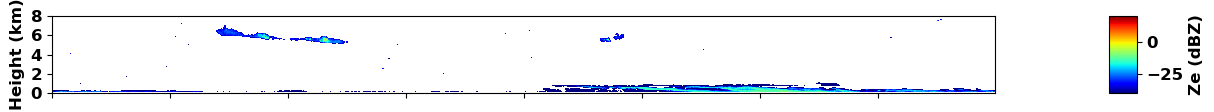

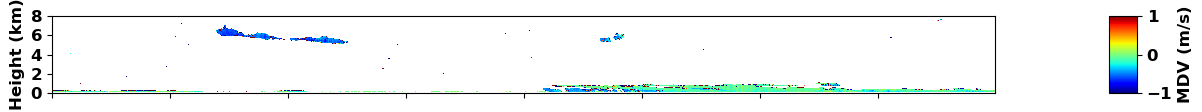

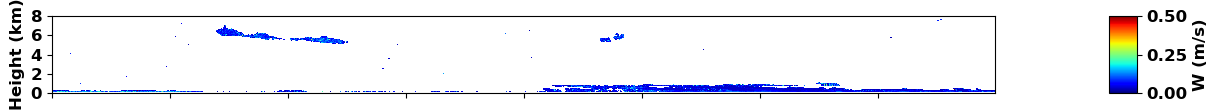

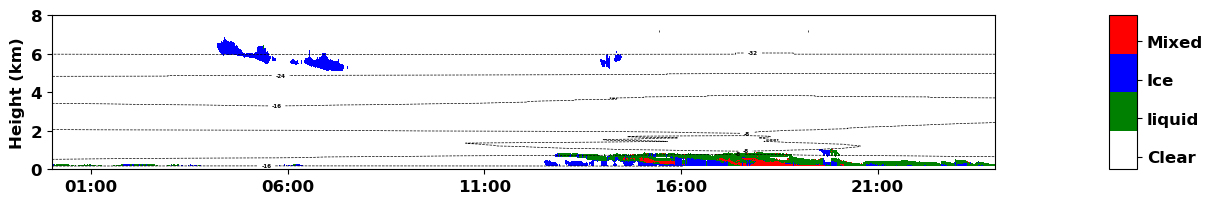

In [110]:
# Plot Radar and MPL Data
color_map = cm.get_cmap("jet")
# mpl backscatter
fig, (ax) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax.pcolormesh(d['time'], d['height'], d['mpl_backscat_ts'], vmin=-3, vmax=2, cmap=color_map, shading='auto')
set_axes(ax, 12, 'bold', 8, 1, r'($\beta$)',"12%")
# mpl_linear_depol_ratio
fig, (ax1) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax1.pcolormesh(d['time'], d['height'], d['mpl_dep'].transpose(),vmin=0, vmax=0.6, cmap=color_map, shading='auto')
set_axes(ax1, 12, 'bold', 8, 1,r'MPL $\beta$',"12%")
# radar Ze
fig, (ax2) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax2.pcolormesh(d['time'], d['height'], d['combined_ze'].transpose(),vmin=-40, vmax=20, cmap=color_map, shading='auto')
set_axes(ax2, 12, 'bold', 8, 1,'Ze (dBZ)',"12%")
# plot radar Doppler velocity
fig, (ax3) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax3.pcolormesh(d['time'], d['height'], d['combined_mdv'].transpose(),vmin=-1, vmax=1, cmap=color_map, shading='auto')
set_axes(ax3, 12, 'bold', 8, 1,'MDV (m/s)',"12%")
# plot radar Doppler spectra width
fig, (ax4) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax4.pcolormesh(d['time'], d['height'], d['combined_w'].transpose(),vmin=0, vmax=0.5, cmap=color_map, shading='auto')
set_axes(ax4, 12, 'bold', 8, 1,'W (m/s)',"12%")
 
################################
 
# Plot cloud phase datasets from ground
 
fig, (ax) = plt.subplots(1,1,figsize=(14,2), sharex=True, sharey=True)
 
# plot cldphase_pixel
cmap = ListedColormap(['w', 'g', 'b', 'r'])
pplot = ax.contour(d['time'], d['height'], d['sonde_temp'].transpose(),vmin=-40, vmax=40, levels = 9, colors = 'black', linestyles = '--',linewidths = 0.5)
ax.clabel(pplot,fontsize = 4,inline = True,fmt='%1.0f')
pplot = ax.pcolormesh(d['time'], d['height'], d['cldphase_mplgr'].transpose(),vmin=0, vmax=4, cmap=cmap, shading='auto')
 
cb, ax = set_axes(ax, 12, 'bold', 8, 0,'',"12%")
 
cb.ax.locator_params(nbins=4)
cb.set_ticks([0.33, 1.33, 2.33, 3.33])
cb.set_ticklabels(['Clear', 'liquid', 'Ice', 'Mixed'])
 
date_fmt = DateFormatter('%H:00')
hour_loc = HourLocator(interval=5)
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_major_locator(hour_loc)

C:\Users\harr732\AppData\Local\Temp\ipykernel_3760\850602010.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap("jet")


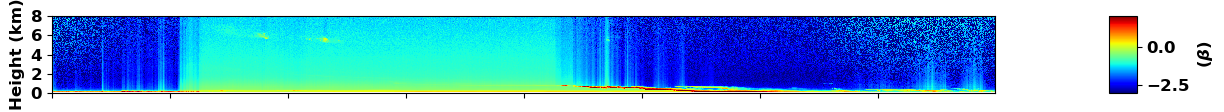

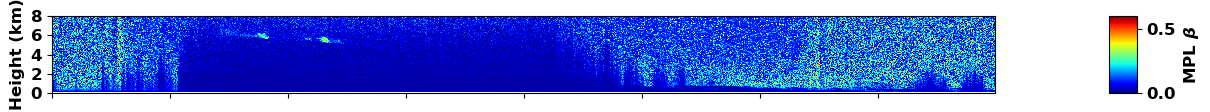

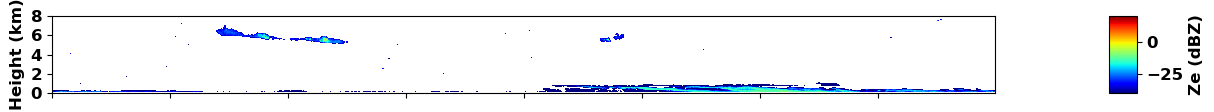

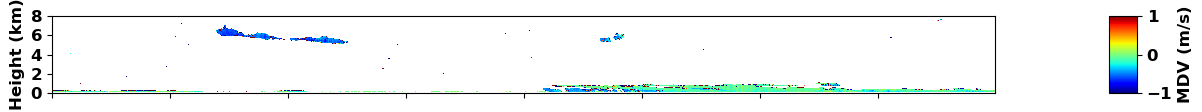

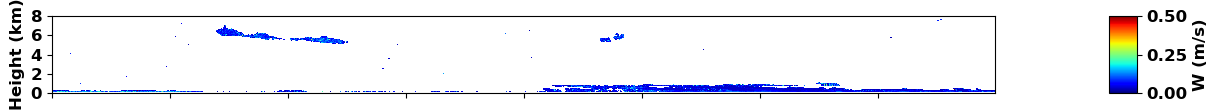

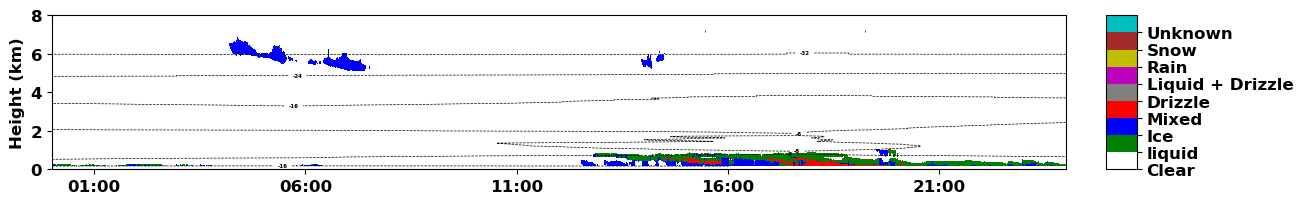

In [112]:
# Plot Radar and MPL Data
color_map = cm.get_cmap("jet")
# mpl backscatter
fig, (ax) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax.pcolormesh(d['time'], d['height'], d['mpl_backscat_ts'], vmin=-3, vmax=2, cmap=color_map, shading='auto')
set_axes(ax, 12, 'bold', 8, 1, r'($\beta$)',"12%")
# mpl_linear_depol_ratio
fig, (ax1) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax1.pcolormesh(d['time'], d['height'], d['mpl_dep'].transpose(),vmin=0, vmax=0.6, cmap=color_map, shading='auto')
set_axes(ax1, 12, 'bold', 8, 1,r'MPL $\beta$',"12%")
# radar Ze
fig, (ax2) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax2.pcolormesh(d['time'], d['height'], d['combined_ze'].transpose(),vmin=-40, vmax=20, cmap=color_map, shading='auto')
set_axes(ax2, 12, 'bold', 8, 1,'Ze (dBZ)',"12%")
# plot radar Doppler velocity
fig, (ax3) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax3.pcolormesh(d['time'], d['height'], d['combined_mdv'].transpose(),vmin=-1, vmax=1, cmap=color_map, shading='auto')
set_axes(ax3, 12, 'bold', 8, 1,'MDV (m/s)',"12%")
# plot radar Doppler spectra width
fig, (ax4) = plt.subplots(1,1,figsize=(14,1), sharex=True, sharey=True)
pplot = ax4.pcolormesh(d['time'], d['height'], d['combined_w'].transpose(),vmin=0, vmax=0.5, cmap=color_map, shading='auto')
set_axes(ax4, 12, 'bold', 8, 1,'W (m/s)',"12%")

################################

# Plot cloud phase datasets from ground

fig, (ax) = plt.subplots(1,1,figsize=(14,2), sharex=True, sharey=True)

# plot cldphase_pixel
cmap = ListedColormap(['w', 'g', 'b', 'r','gray','m','y','brown','c'])
pplot = ax.contour(d['time'], d['height'], d['sonde_temp'].transpose(),vmin=-40, vmax=40, levels = 9, colors = 'black', linestyles = '--',linewidths = 0.5)
ax.clabel(pplot,fontsize = 4,inline = True,fmt='%1.0f')
pplot = ax.pcolormesh(d['time'], d['height'], d['cldphase_mplgr'].transpose(),vmin=0, vmax=9, cmap=cmap, shading='auto')

cb, ax = set_axes(ax, 12, 'bold', 8, 0,'',"4%")

cb.ax.locator_params(nbins=8)
#cb.set_ticks([0.33, 1.33, 2.33, 3.33, 4.33, 5.33, 6.33, 7.33, 8.33])
cb.set_ticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
cb.set_ticklabels(['Clear', 'liquid', 'Ice', 'Mixed','Drizzle','Liquid + Drizzle','Rain','Snow','Unknown'])

date_fmt = DateFormatter('%H:00')
hour_loc = HourLocator(interval=5)
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_major_locator(hour_loc)
